In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

# Import and Clean Data

In [19]:
weekly_compound_sentiment = pd.read_csv('./weekly_mean_compound_sentiment_by_company.csv')

In [20]:
weekly_close_price = pd.read_csv('./weekly_mean_closing_price_by_ticker_all.csv')

In [21]:
weekly_compound_sentiment.set_index('Year-Week',inplace=True)

In [24]:
weekly_close_price.set_index('Year-Week', inplace=True)

## Merge datasets of First Solar

In [28]:
first_solar = pd.DataFrame(weekly_compound_sentiment['first_solar'])
first_solar = pd.merge(first_solar, weekly_close_price['FSLR'], how='left', left_on=['Year-Week'], right_on=['Year-Week'])
first_solar.rename(columns={"first_solar":"Compound Sentiment","FSLR":"close"}, inplace=True)
first_solar.dropna(inplace=True)

# Lag Analysis 
----

In [30]:
def plot_cross_correlation(df):
    fig, ax1 = plt.subplots(figsize=(18,5))
    ax1.xcorr(df['Compound Sentiment'].to_numpy().flatten(), df['close'].to_numpy().flatten(), usevlines=True, maxlags=50, normed=True, lw=2)
    ax1.grid(True)
    plt.show()

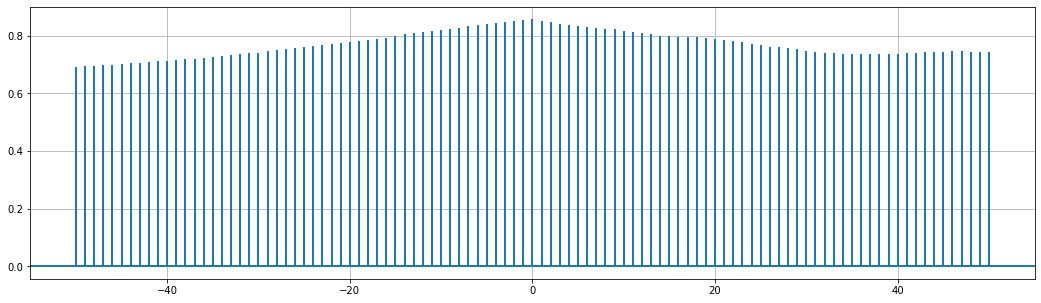

In [31]:
plot_cross_correlation(first_solar)